In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
sns.set()

In [3]:
df = pd.read_csv('data/googleplaystore.csv')

In [ ]:
# preprocessing
df.info()
df.columns = [col.replace(' ', '_') for col in df.columns]
col = [col for col in df.columns]

In [ ]:
# drop
df = df.drop(10472)
df = df.reset_index()

In [12]:
# column reviwes to numeric
df.Reviews = pd.to_numeric(df.Reviews)

In [ ]:
# categories frequency
tmp = df.groupby('Category').size().rename('Count')
tmp.plot(kind='bar', color='purple', alpha=0.5, title='Categories')

<AxesSubplot:ylabel='None'>

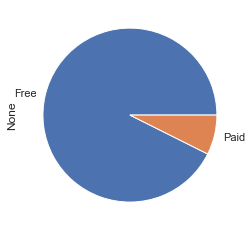

In [16]:
#  type frequency
tmp2 = df.groupby('Type').size()
tmp2.plot(kind='pie')


In [ ]:
# 
df = df[['Genres', 'Rating', 'Type']]
tmp2 = df.groupby(['Genres', 'Type']).agg({'Rating':['count', 'mean']})
tmp2.columns = ['_'.join(x) for x in tmp2.columns.ravel()]
tmp2 = tmp2.sort_values('Rating_count', ascending=False)
tmp2.plot(kind='bar', subplots=True, cmap='viridis')

In [25]:
#  top 5 rating products
top_5 = tmp2.nlargest(5, columns='Rating_count')
top_5.plot(kind='pie', subplots=True)